# 3commas DCA Bots

### ⚠️ Earnings, Losses, and Final Profits/Results are displayed based on the current prices of base assets (according to the dict  'current_prices' below), not by their price at the time of the respective trades ⚠️

### ✳️ Required User Inputs

In [1]:
filename = "3commas_dummy.csv"

#Current prices in USD 
current_prices = {"USDT": 1, 
                  "BTC": 48455, 
                  "ETH": 1519}

In [2]:
# Define dates, if you want to slice the entire dataframe per period
# Expected format: "2021-12-31"
start_date = "" 
end_date = "" 

In [3]:
# HELPERS
# These variables can be dynamically used accross the notebook

status_closed = ["completed", "stop_loss_finished"]

result_columns = ["close_date", "earnings", "losses", "profit_usd"]
those_columns = ["closed"]
those_columns += result_columns

dead_bots = ["Gordon-Conservative", "Gordon-Agressive", "Gordon-LEV-Conservative", \
             "Gordon-LEV-Moderate", "Gordon-LEV-Agressive", "Gordon-Moderate-TP1.5-SL8", \
             "RSI7 < 30 3m", "RSI7 < 30 3m OTHER COINS", "RSI7 < 30 3m Q-USDT P-B ACCUM", \
             "TV+RSI Q-USDT P-ACCUM NSL", "BitcoinBull BTC P-Q D-21-01-12-03-09", \
             "TV+RSI Q-USDT P-Q BEST PAIRS", "GordonMod P-Q D-21-01-12-01-52", 
             "CQS P-Q D-21-01-06-15-46", "CQS P-Q D-21-01-09-15-29", "CQS P-B D-21-01-06-15-54", \
             "Hirn P-Q D-21-01-12-00-4", "Hirn P-Q D-21-01-12-00-44", "PUABP BTC P-Q D-21-01-29-17-23"]

### Setting up the stage!

In [4]:
import pandas as pd
import numpy as np
import datetime as dt

from datetime import date
import matplotlib.pyplot as plt

from commas3.source.commas3 import *

plt.style.use("fivethirtyeight")

In [5]:
folder = "commas3/data/"
source = folder + filename
data = commasData(source, current_prices, status_closed)

In [6]:
if start_date and end_date:
    data = data[(data["close_date"] >= start_date) &
                (data["close_date"] <= end_date)]

# ⬇️ CRITICAL! ----------------------------------------------------------

## Living Bots with Less than [n] % Assertiveiness

In [7]:
n = 95

In [8]:
df = data
df = df[(~df["bot"].isin(dead_bots)) &
        (df["status"].isin(status_closed))]
df = df["final_profit"].gt(0).groupby(df["bot"]).mean().mul(100).sort_values(ascending=True)
df = df[df < n]
df

bot
Stoic BTC P-Q TP25 D-21-02-09-19-15          87.654321
CryptoTrades BTC P-Q D-21-02-07-11-46        90.825688
QFL-OR USDT P-Q D-21-02-08-20-27             91.358025
Stoic USDT P-Q TP25 D-21-02-09-19-07         91.588785
Hirn USDT P-Q D-21-01-12-00-37               93.023256
Blockparty USDT P-Q TP25 D-21-01-30-20-12    93.328419
Name: final_profit, dtype: float64

## Living Bots with less than [n] USD of profit

In [9]:
n = 100

In [10]:
df = data
df = df[(~df["bot"].isin(dead_bots)) &
        (df["status"].isin(status_closed))]
df = df.groupby("bot")["profit_usd"].sum().sort_values(ascending=True)
df = df[df < n]
df

bot
Stoic BTC P-Q TP25 D-21-02-09-19-15     -781.062620
CryptoTrades BTC P-Q D-21-02-07-11-46   -302.805471
QFL-PT USDT P-B D-21-02-28-15-21           3.861969
RSI30+TVbuy USDT P-B D-21-02-06-18-18      6.570995
QFL-PT BTC P-Q D-21-02-28-14-57           13.454984
PUABP USDT P-B D-21-01-29-17-27           37.833970
Hirn USDT P-B D-21-01-12-01-00            66.837790
Blockparty USDT P-B D-21-01-30-20-03      71.196355
Oni USDT P-Q D-21-07-01-20-36             71.607677
QFL-OR USDT P-Q D-21-02-08-20-27          99.067846
Name: profit_usd, dtype: float64

# ⬇️ PER DATES ----------------------------------------------------------

### Results per Month

In [11]:
df = data
profit_usd = df.groupby(df["closed_at"].dt.strftime('%Y %B'), sort = False)['profit_usd'].sum()
profit_usd = round(profit_usd, 2)
closed_trades = df.groupby(df["closed_at"].dt.strftime('%Y %B'), sort = False)['closed'].sum()
profit_bought_volume = df.groupby(df["closed_at"].dt.strftime('%Y %B'), sort = False)['bought_volume'].sum()
profit_trade_avg = df.groupby(df["closed_at"].dt.strftime('%Y %B'), sort = False)['profit_percentage_from_total_volume'].mean()
df = pd.DataFrame([profit_usd, closed_trades, profit_bought_volume, profit_trade_avg]).transpose()
df

,profit_usd,closed,bought_volume,profit_percentage_from_total_volume
closed_at,,,,
2020 December,-173.44,190.0,19004.559642,0.345631
2021 January,3580.42,896.0,229388.697385,1.693225
2021 February,13679.48,4288.0,912143.214602,1.608088
2021 March,4521.63,574.0,165786.565453,1.925182


## Results per Periods

In [12]:
df = data
t = [7, 30]

In [13]:
commasProfitPerPeriod(data, status_closed, t)

---------------- Today ----------------
Operational bots: 16
Closed trades: 113
Avg profit per day: $543.0078165499998
Total Profit: $543.0078165499998

---------------- Yesterday ----------------
Operational bots: 13
Closed trades: 113
Avg profit per day: $856.2132046399997
Total Profit: $856.2132046399997

---------------- 7 ----------------
Operational bots: 22
Closed trades: 945
Avg profit per day: $579.2859898914286
Total Profit: $4055.0019292399998

---------------- 30 ----------------
Operational bots: 32
Closed trades: 4791
Avg profit per day: $584.3601290846667
Total Profit: $17530.80387254

---------------- All Time ----------------
Operational bots: 44
Closed trades: 5948
Avg profit per day: $292.00115341918917
Total Profit: $21608.08535302



## Results per day

In [14]:
t = 1000

Text(0.5, 1.0, '3Commas DCA Bots')

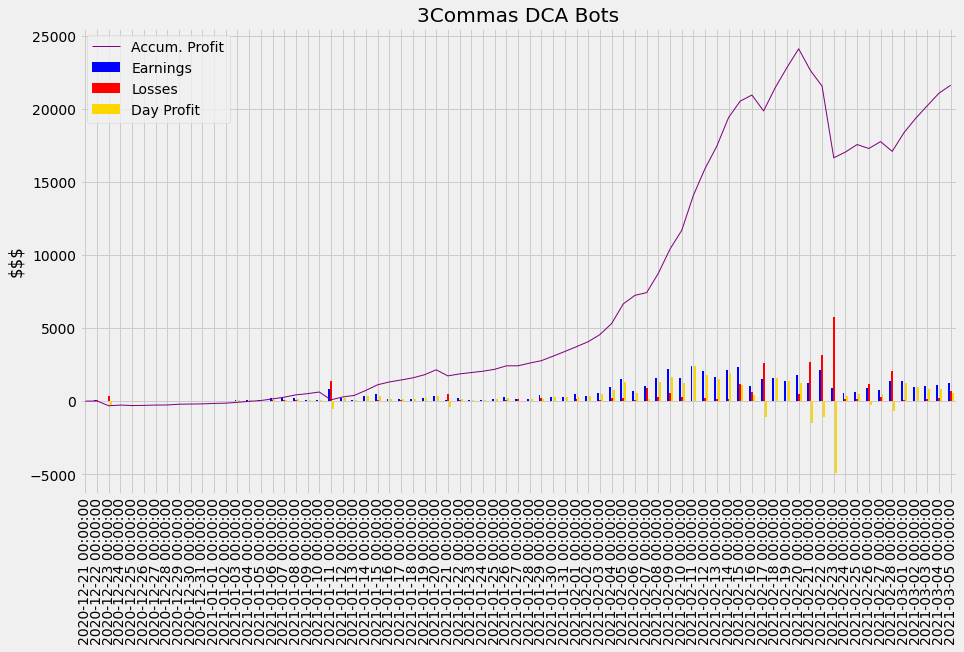

In [15]:
df = commasSliceData(data, t)
commasGraphResultsPerDay(df, result_columns)

# Results per day

In [16]:
df.groupby("close_date")[those_columns].sum().sort_values(by="close_date", ascending=False)

,closed,earnings,losses,profit_usd
close_date,,,,
2021-03-05,113,1228.438899,685.431082,543.007817
2021-03-04,113,1107.538886,251.325681,856.213205
2021-03-03,109,1032.525945,162.910814,869.615130
2021-03-02,99,982.968655,0.000000,982.968655
2021-03-01,140,1367.576306,97.746844,1269.829462
...,...,...,...,...
2020-12-25,17,10.304723,43.096156,-32.791433
2020-12-24,25,49.062421,0.000000,49.062421
2020-12-23,36,52.304026,379.703243,-327.399217


# ⬇️ PER BOT ----------------------------------------------------------

In [17]:
t = 1000
remove_dead = True

In [18]:
df = commasSliceData(data, t)
if remove_dead:
    df = df[~df["bot"].isin(dead_bots)]
    
df.groupby("bot")[those_columns].sum().sort_values(by="bot")    

,closed,earnings,losses,profit_usd
bot,,,,
Blockparty USDT P-B D-21-01-30-20-03,13,71.196355,0.000000,71.196355
Blockparty USDT P-Q TP25 D-21-01-30-20-12,2713,20202.731159,11864.582577,8338.148581
CryptoTrades BTC P-Q D-21-02-07-11-46,109,1421.588780,2601.925445,-1180.336665
Hirn USDT P-B D-21-01-12-01-00,5,66.837790,0.000000,66.837790
Hirn USDT P-Q D-21-01-12-00-37,43,412.380724,205.294187,207.086537
HirnVIP BTC P-Q D-21-01-29-17-36,120,1917.041155,1109.214416,807.826739
Keiko BTC P-Q D-21-01-17-10-09,24,323.089218,0.000000,323.089218
Oni BTC P-Q D-21-01-17-08-06,11,177.091396,0.000000,177.091396
Oni USDT P-Q D-21-07-01-20-36,10,71.607677,0.000000,71.607677


### ⚠️ IS bought_volume ☝🏽 always in USD???? 🧐

In [19]:
t = 7

Text(0.5, 1.0, '3Commas DCA Bots')

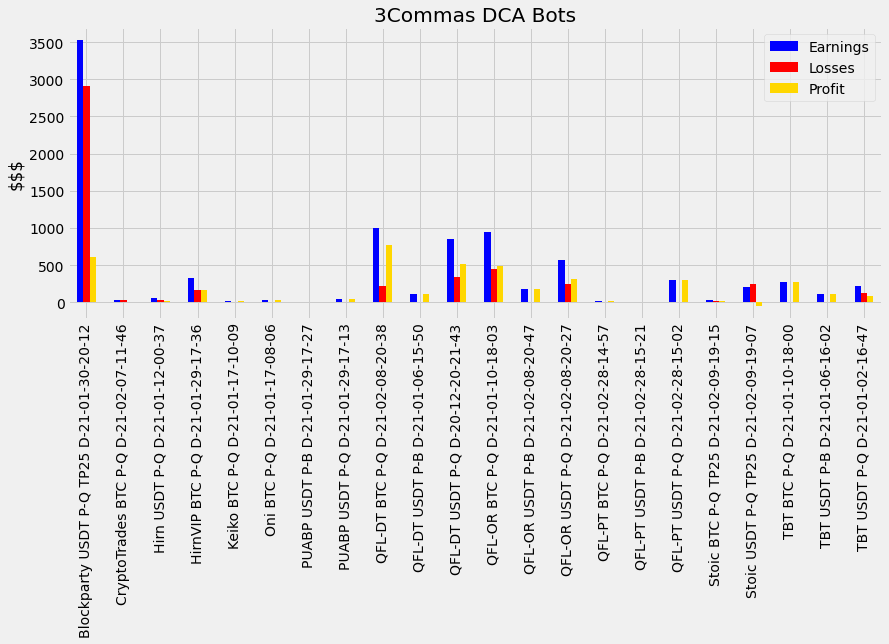

In [20]:
df = commasSliceData(data, t)
commasGraphResultsPerBot(df, result_columns)

In [34]:
t = 30
squares = 13

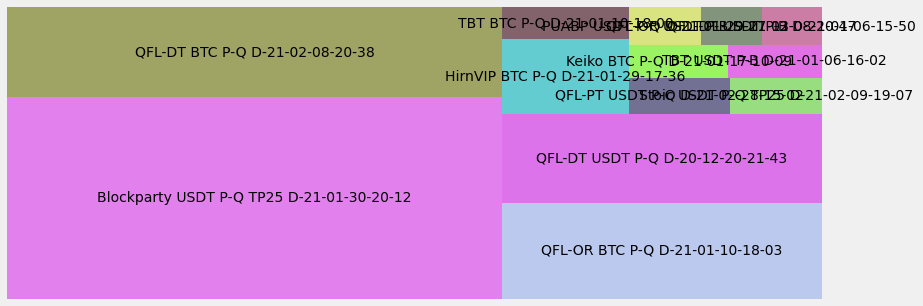

In [35]:
df = commasSliceData(data, t)
commasTreeMap(df, "bot", squares)

# ⬇️ PER QUOTE ----------------------------------------------------------

In [21]:
df = data
bought_volume = df.groupby("quote")["bought_volume"].agg("sum")
profit_usd = df.groupby("quote")["profit_usd"].agg("sum")
profit_usd_total = df["profit_usd"].sum()
closed_trades = df.groupby("quote")["closed"].agg("sum")
df = pd.DataFrame([bought_volume, profit_usd, closed_trades]).transpose()
df["%"] = np.nan
for quote in df.index:
    df.loc[quote]["%"] = (df.loc[quote]["profit_usd"] * 100)/ profit_usd_total
    df.loc[quote]["bought_volume"] = df.loc[quote]["bought_volume"] * current_prices[quote]
df["return"] = (df["profit_usd"] * 100) / df["bought_volume"]
df = df.sort_values("%", ascending=False)
df

,bought_volume,profit_usd,closed,%,return
quote,,,,,
USDT,1.326309e+06,15085.699464,4828.0,69.815068,1.137419
BTC,6.422026e+05,6491.989271,1115.0,30.044260,1.010894
ETH,6.336752e+02,30.396618,5.0,0.140672,4.796877


# Quote x Day

In [22]:
df = data
df.groupby(["close_date", "quote"])[those_columns].sum().sort_values(by="close_date", ascending=False)

closed    earnings      losses  profit_usd
close_date quote                                            
2021-03-05 USDT       92  820.229267  551.101224  269.128043
           BTC        21  408.209632  134.329858  273.879774
2021-03-04 USDT       95  943.021563  243.461435  699.560128
           BTC        18  164.517323    7.864247  156.653077
2021-03-03 USDT       89  768.136567   47.548181  720.588386
...                  ...         ...         ...         ...
2020-12-25 USDT       17   10.304723   43.096156  -32.791433
2020-12-24 USDT       25   49.062421    0.000000   49.062421
2020-12-23 USDT       36   52.304026  379.703243 -327.399217
2020-12-22 USDT       42   97.391586   87.525247    9.866340
2020-12-21 USDT        5   13.991348    0.000000   13.991348

[133 rows x 4 columns]

# ⬇️ PER PAIR ----------------------------------------------------------

## Best [t][n] Results

In [23]:
t = 30
n = 10

In [24]:
df = commasSliceData(data, t)
df = df.groupby("pair")[result_columns].sum()
df = df["profit_usd"].nlargest(n)
df

pair
USDT_BNB     606.170474
BTC_EGLD     479.246600
USDT_SAND    347.808755
USDT_FTM     334.083476
BTC_BAND     332.545696
USDT_IOTA    330.519396
BTC_SXP      320.228919
USDT_CHZ     311.600744
USDT_ANKR    310.082876
USDT_ICX     308.703585
Name: profit_usd, dtype: float64

<AxesSubplot:xlabel='pair'>

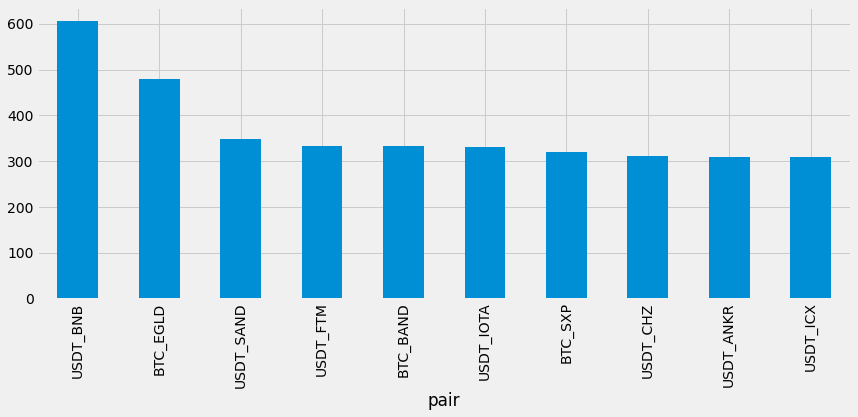

In [25]:
df.plot(kind="bar", figsize=(13,5), grid=True, rot=90)

## Worst [t][n] Results

In [26]:
t = 30
n = 10

In [27]:
df = commasSliceData(data, t)
df = df.groupby("pair")[result_columns].sum()
df = df["profit_usd"].nsmallest(n)
df

pair
BTC_REEF    -705.659856
BTC_XLM     -457.611443
BTC_SKL     -450.766205
BTC_KAVA    -400.383180
BTC_BZRX    -322.410848
BTC_OGN     -262.965285
BTC_1INCH   -249.627077
BTC_WABI    -243.726227
BTC_HBAR    -230.307584
USDT_XVS    -213.213069
Name: profit_usd, dtype: float64

<AxesSubplot:xlabel='pair'>

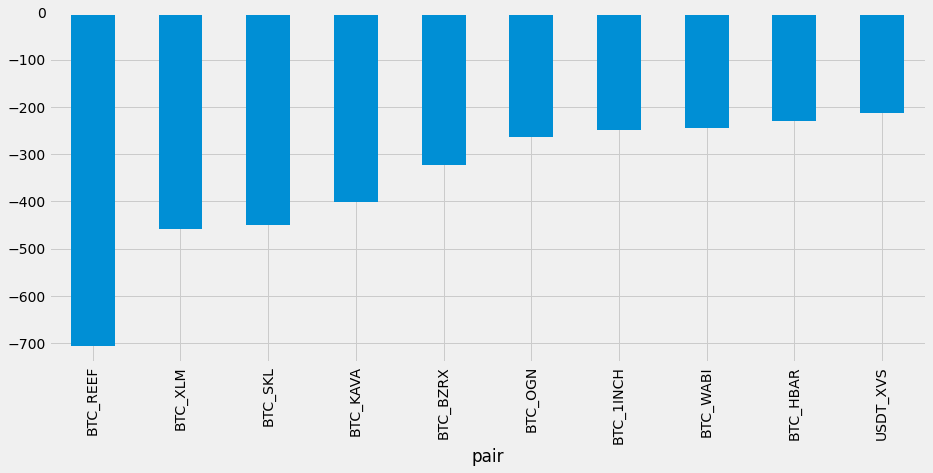

In [28]:
df.plot(kind="bar", figsize=(14,6), grid=True, rot=90)

In [32]:
t = 30
squares = 13

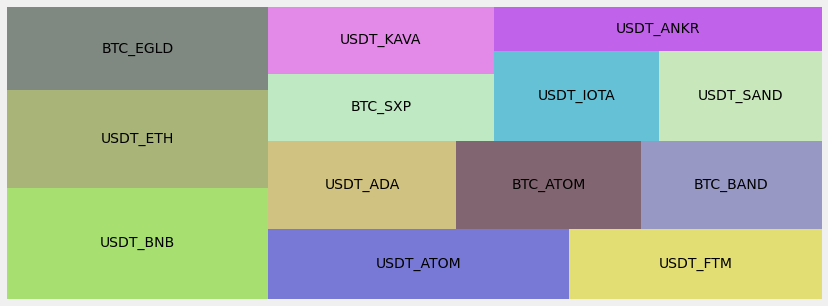

In [33]:
df = commasSliceData(data, t)
commasTreeMap(data, "pair", squares)